# Ecuación de la Onda

# Introducción

Una gama muy amplia de procesos físicos conducen al movimiento ondulatorio, donde las señales se propagan a través de un medio en el espacio y el tiempo, normalmente con poco o ningún movimiento permanente del propio medio. Muchos tipos de movimiento ondulatorio pueden describirse mediante la ecuación
  $$u_{tt}=∇⋅(c^{2}∇u)+f,$$ 
que resolveremos en el próximo texto mediante métodos de diferencias finitas.

Comenzamos nuestro estudio de ecuaciones de onda simulando ondas unidimensionales en una cuerda, digamos en una guitara.

Imaginemos que tenemos una cuerda de guitarra tensada de longitud $L$. Consideremos únicamente las vibraciones en una dirección. 
$x$ denota la posición a lo largo de la cuerda, seadenota el tiempo, $u$ denota el desplazamiento de la cuerda desde la posición de reposo.

![guitar-2.png](guitar.png)

La función de desplazamiento $u$ se rige por el modelo matemático

\begin{align}
u_{tt}=c^{2}u_{xx},  \ \ x\in (0,L), \ \  t\in (0,T) \nonumber\\
\end{align}

por alguna constante $c^{2}>0$ . La ecuación de onda es un ejemplo de PDE hiperbólica.

Supongamos que los extremos de la cuerda están fijos en su lugar como en la guitarra:
$$u(0,t)=0 \ \ \  \ \ u(L,t)=0, \ \ t \in (0,T)$$
Tenga en cuenta que tenemos dos condiciones a lo largo del eje $x$ ya que hay dos derivadas en la dirección $x$.
dirección.

También hay dos derivadas a lo largo de la dirección $t$ y por lo tanto necesitamos dos condiciones más aquí.Necesitamos saber la posición inicial y la velocidad inicial de la cuerda. Es decir, para algunas funciones conocidas $f(x)$ y $g(x)$.
$$u(x,0)=f(x)= \ \ \  \ \ u_{t}(x,0)=g(x),  \ \ \ x \in (0,L)$$


#### a) **Verifique por sustitucion directa que $u(x,t) = \sin (\pi n x) \cos(2n \pi t)$ es una solucion de la ecuacion de ondas $u_{tt}(u,t) = 4u_{xx}(x,t)$ para cada numero natural n =1,2, ...**


In [1]:
import sympy as sp

# Definamos las variables
x, t, n = sp.symbols('x t n')
# u(x, t) = sin(n*pi*x) * cos(2*n*pi*t)
u = sp.sin(n * sp.pi * x) * sp.cos(2 * n * sp.pi * t)

# Calcula la segunda derivada parcial con respecto x
u_xx = sp.diff(u, x, x)

#Calcula la segunda derivada parcial con respecto t
u_tt = sp.diff(u, t, t)

print("\nLa segunda derivada parcial con respecto x, u_{xx}:")
sp.pprint(u_xx)

print("\nLa segunda derivada parcial con respecto t, u_{tt}:")
sp.pprint(u_tt)


La segunda derivada parcial con respecto x, u_{xx}:
  2  2                        
-π ⋅n ⋅sin(π⋅n⋅x)⋅cos(2⋅π⋅n⋅t)

La segunda derivada parcial con respecto t, u_{tt}:
    2  2                        
-4⋅π ⋅n ⋅sin(π⋅n⋅x)⋅cos(2⋅π⋅n⋅t)


Observe que 
\begin{align}
u_{tt}&=-4π^{2} ⋅n^{2} ⋅sin(π⋅n⋅x)⋅cos(2⋅π⋅n⋅t)\\
&=4(-π^{2} ⋅n^{2} ⋅sin(π⋅n⋅x)⋅cos(2⋅π⋅n⋅t))\\
&=4u_{xx}.
\end{align}

Esta ultima igualdad es válida debido a $u_{xx}=-π^{2} ⋅n^{2} ⋅sin(π⋅n⋅x)⋅cos(2⋅π⋅n⋅t)$. Por tanto concluimos que $u(x,t)$ es solución de $u_{tt}(x,t) = 4u_{xx} (x,t)$


#### b) **Verifique por sustitución directa que $u(x,t) = \sin(n\pi x) \cos(cn\pi t)$ es una solución de la ecuación de ondas $u_{tt}(x,t) = c^2u_{xx}(x,t)$ para cada número natural n = 1, 2, ...**

In [2]:

# Definamos las variables
x, t, n, c = sp.symbols('x t n c')
# u(x, t) = sin(n*pi*x) * cos(2*n*pi*t)
u = sp.sin(n * sp.pi * x) * sp.cos(c* n * sp.pi * t)

# Calcula la segunda derivada parcial con respecto x
u_xx = sp.diff(u, x, x)

#Calcula la segunda derivada parcial con respecto t
u_tt = sp.diff(u, t, t)

print("\nLa segunda derivada parcial con respecto x, u_{xx}:")
sp.pprint(u_xx)

print("\nLa segunda derivada parcial con respecto t, u_{tt}:")
sp.pprint(u_tt)


La segunda derivada parcial con respecto x, u_{xx}:
  2  2                        
-π ⋅n ⋅sin(π⋅n⋅x)⋅cos(π⋅c⋅n⋅t)

La segunda derivada parcial con respecto t, u_{tt}:
  2  2  2                        
-π ⋅c ⋅n ⋅sin(π⋅n⋅x)⋅cos(π⋅c⋅n⋅t)


En los Ejercicios 4 y 5, use el método de las diferencias finitas para calcular las tres primeras filas de la solución aproximada de la ecuación de ondas dada. Realice las operaciones a mano (o con calculadora).

In [3]:
import modulos_onda as onda
import numpy as np


### **4. Ejercicio**
$$
\begin{align*}
    u_{tt}(x,t) = 4u_{xx}(x,t) \qquad \text{ Para } \qquad  0 \leq x \leq 1 \qquad y \qquad 0 \leq t \leq 0.5 
\end{align*}
$$
Con las condiciones de entorno 
$$
\begin{align*}
    &u(0,t) = 0 \qquad y \qquad u(1,t) = 0 \qquad &para \qquad 0 \leq t \leq 0.5 \\ \\ 
    &u(x,0) = f(x) = \sin(\pi x) \qquad  &para \qquad 0 \leq x \leq 1 \\ \\
    &u(x,0) = g(x) = 0 \qquad  &para \qquad 0 \leq x \leq 1  \\ \\
\end{align*}
$$
Tome $h = 0.2$, $k = 0.1$ y $r = 1$

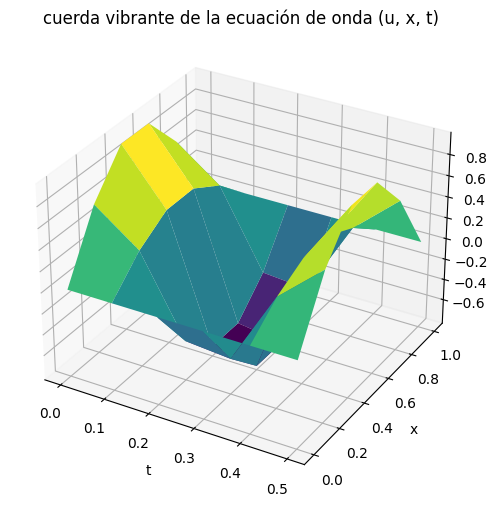

In [4]:
# condiciones de frontera 
f = lambda x: np.sin(np.pi * x)
g = lambda x : 0.0

g0 = lambda t: 0
g1 = lambda t : 0

# parametros

L = 1
T = 0.5
Nx = 6
Nt = 6
c = 2


x,t,u = onda.solve_wave_equation(f,g,g0,g1,L,T,Nx,Nt,c,h=0.2,k=0.1)
onda.plot_wave_solution(x,t,u)

In [5]:
onda.create_solution_dataframe(t,u)

,t_j,x_2,x_3,x_4,x_5
0,0.0,0.587785,0.951057,0.951057,0.587785
1,0.1,0.277515,0.449028,0.449028,0.277515
2,0.2,-0.456761,-0.739054,-0.739054,-0.456761
3,0.3,-0.493168,-0.797962,-0.797962,-0.493168
4,0.4,0.223918,0.362308,0.362308,0.223918
5,0.5,0.598888,0.969021,0.969021,0.598888


## **5. Ejercicio** 
$$
\begin{align*}
    u_{tt}(x,t) = 4u_{xx}(x,t) \qquad \text{ Para } \qquad  0 \leq x \leq 1 \qquad y \qquad 0 \leq t \leq 0.5 
\end{align*}
$$
Con las condiciones de entorno 
$$
\begin{align*}
    &u(0,t) = 0 \qquad y \qquad u(1,t) = 0 \qquad &para \qquad 0 \leq t \leq 0.5 \\ \\ 
    &u(x,0) = f(x) = 
    \begin{cases}
    \frac{5x}{2}  \qquad &para \quad 0 \leq x \leq \frac{3}{5} \\
    \frac{15-15x}{4} \qquad &para \quad \frac{3}{5} \leq x \leq 1 \\
    \end{cases} \\ \\
    &u(x,0) = g(x) = 0 \qquad  &para \qquad 0 \leq x \leq 1  \\ \\
\end{align*}
$$
Tome $h = 0.2$, $k = 0.1$ y $r = 1$

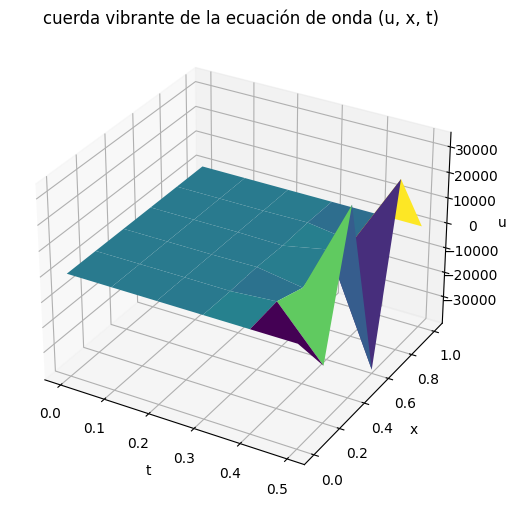

In [6]:
# condiciones de frontera 
def f(x):
    y = x.copy() 
    y[(x >= 0) & (x <= 0.6)] =2.5* x[(x >= 0) & (x <= 0.6)]
    y[(x > 0.6) & (x <= 1)] = 3.75 - 3.75 * x[(x > 0.6) & (x <= 1)]
    return y

g = lambda x : 0.0

g0 = lambda t: 0
g1 = lambda t : 0

# parametros
L = 1
T = 0.5
Nx = 6
Nt = 6
c = 2


x,t,u = onda.solve_wave_equation(f,g,g0,g1,L,T,Nx,Nt,c,h=0.2,k=0.1)
onda.plot_wave_solution(x,t,u)

# Algoritmos y Programas

En los Problemas 1 a 8, use el programa 10.1 para resolver la ecuación de ondas $u_{tt} = c^2u_{xx} $ para $ 0 \leq x \leq a $  y $ 0 \leq t \leq b $ con las condiciones de entorno 
$$
\begin{align*}
    &u(0,t) = 0 \qquad y \qquad u(a,t) = 0 \qquad &para \qquad 0 \leq t \leq b \\ \\ 
    &u(x,0) = f(x) \qquad  &para \qquad 0 \leq x \leq a \\ \\
    &u(x,0) = g(x)  \qquad  &para \qquad 0 \leq x \leq a  \\ \\
\end{align*}
$$
empleando los valores dados en cada caso. Use las instrucciones : *surf* y *contour* para dibujar sus soluciones aproximadas.

 ### **Ejercicio 1**
1. Use $ a = 1, \quad b = 1, \quad c = 1, \quad f(x) = \sin(\pi x) $ y $ g(x) = 0 $. Por conveniencia, tome $ h = 0.1 $ y $ k = 0.1$

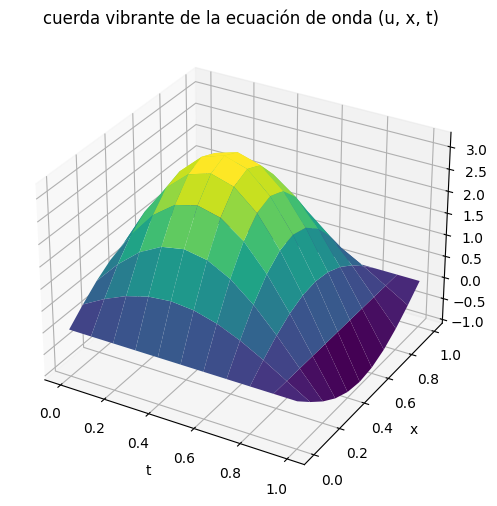

In [7]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 1  # velocidad de la onda
h = 0.1 #tamaño de paso espacial
k = 0.1 #tamaño de paso temporal

f = lambda x : np.sin(np.pi * x)
g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c,h,k)

onda.plot_wave_solution(x,t,u)


### **Ejercicio 2**
2. Use $ a = 1, \quad b = 1, \quad c = 1, \quad f(x) = x - x^2 $ y $g(x) = 0 $ Por conveniencia, tome $ h = 0.1 $ y $ k = 0.1$

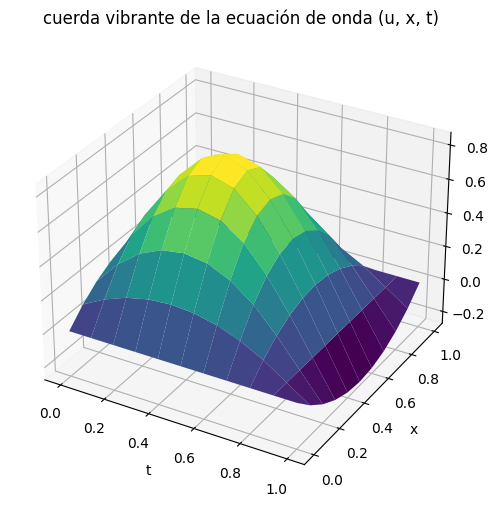

In [8]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 1  # velocidad de la onda
h = 0.1 #tamaño de paso espacial
k = 0.1 #tamaño de paso temporal

f = lambda x : x - x**2
g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c)

onda.plot_wave_solution(x,t,u)

 ### **Ejercicio 3**
3. Use $ a = 1, \quad b = 1, \quad c = 1, \quad $
$$
\begin{align*}
    f(x) = \begin{cases}
    2x  \qquad &para \quad 0 \leq x \leq \frac{1}{2} \\
    2 - 2x \qquad &para \quad \frac{1}{2} \leq x \leq 1 \\
\end{cases}
\end{align*}
$$
y $g(x) = 0, \quad h = 0.1, \quad k = 0.1 $ 

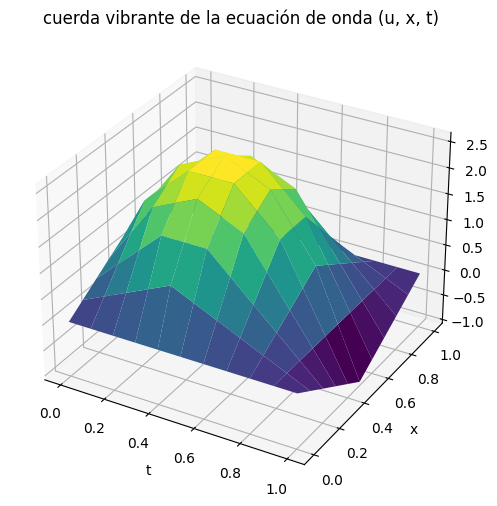

In [9]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 1  # velocidad de la onda
h = 0.1 #tamaño de paso espacial
k = 0.1 #tamaño de paso temporal

def f(x):
    y = x.copy()  # Create a copy of x to avoid modifying the original array
    y[(x >= 0) & (x <= 0.5)] =2* x[(x >= 0) & (x <= 0.5)]
    y[(x > 0.5) & (x <= 1)] = 2 - 2 * x[(x > 0.5) & (x <= 1)]
    return y

g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c)

onda.plot_wave_solution(x,t,u)

### **Ejercicio 4**
4. Use $ a = 1, \quad b = 1, \quad c = 2, \quad $ $f(x) = \sin( \pi x) , \quad g(x)=0, \quad h =0.1, \quad k =0.05$

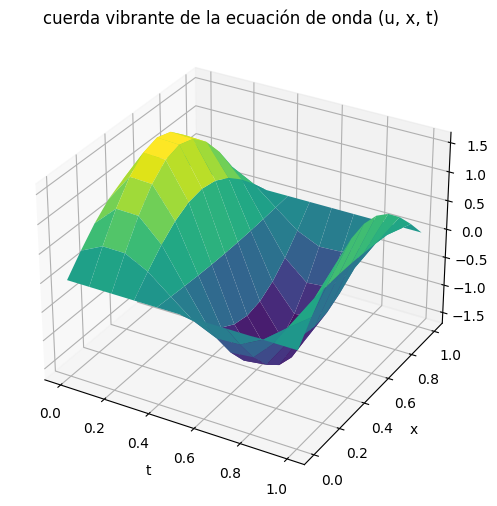

In [10]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 2 # velocidad de la onda

h = 0.1 #tamaño de paso espacial
k = 0.05 #tamaño de paso temporal

f = lambda x : np.sin(np.pi * x)
g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c)

onda.plot_wave_solution(x,t,u)

### **Ejercicio 5**
5. Use $ a = 1, \quad b = 1, \quad c = 2, \quad $ $f(x) = x-x^2 , \quad g(x)=0, \quad h =0.1, \quad k =0.05$

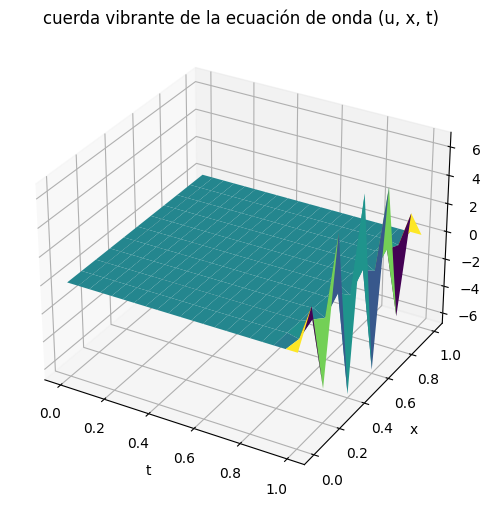

In [11]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 21 # número de puntos de discretización temporal
c = 2  # velocidad de la onda

h = 0.1 #tamaño de paso espacial
k = 0.05 #tamaño de paso temporal


f = lambda x : x - x**2
g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c)

onda.plot_wave_solution(x,t,u)

### **Ejercicio 6**

6. Repita el problema 3, pero tomando $ c = 2 \quad, k = 0.05$

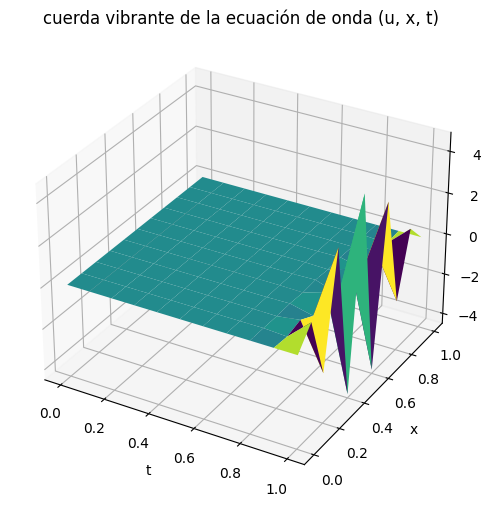

In [12]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 2  # velocidad de la onda

h = 0.1 #tamaño de paso espacial
k = 0.05 #tamaño de paso temporal


def f(x):
    y = x.copy()  # Create a copy of x to avoid modifying the original array
    y[(x >= 0) & (x <= 0.5)] =2* x[(x >= 0) & (x <= 0.5)]
    y[(x > 0.5) & (x <= 1)] = 2 - 2 * x[(x > 0.5) & (x <= 1)]
    return y

g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c)

onda.plot_wave_solution(x,t,u)

### **Ejercicio 7**
7. Repita el problema 1, pero tomando $f(x) = sen(2 \pi x) + sen(4 \pi x) $

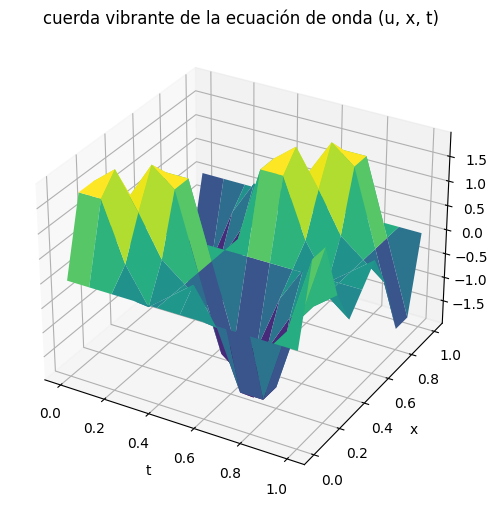

In [13]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 1  # velocidad de la onda

h = 0.1 #tamaño de paso espacial
k = 0.1 #tamaño de paso temporal

f = lambda x : np.sin(2*np.pi * x) + np.sin(4*np.pi * x)
g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c,h,k)

onda.plot_wave_solution(x,t,u)

### **Ejercicio 8**
8. Repita el problema 2, pero tomando $ c = 2, f(x) = sen(2 \pi x) + sen(4 \pi x)$

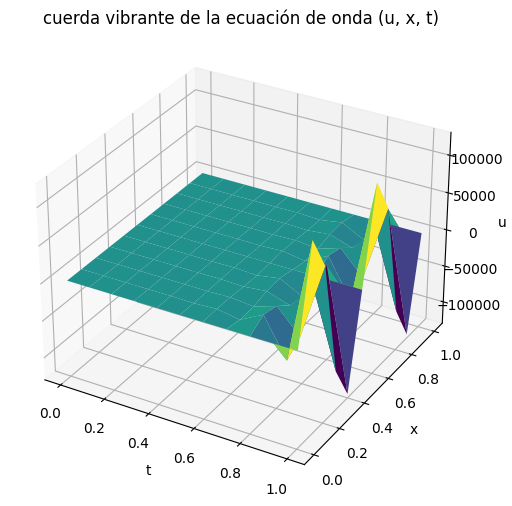

In [14]:
a = 1 #longitud del dominio espacial
b = 1 #tiempo total de simulación
Nx = 11 # número de puntos de discretización espacial
Nt = 11 # número de puntos de discretización temporal
c = 2 # velocidad de la onda

h = 0.1 #tamaño de paso espacial
k = 0.1 #tamaño de paso temporal

f = lambda x : np.sin(2*np.pi * x) + np.sin(4*np.pi * x)
g = lambda x : 0
gt1 = lambda t : 0
gt2 = lambda t : 0

x,t,u = onda.solve_wave_equation(f,g,gt1,gt2,a,b,Nx,Nt,c)

onda.plot_wave_solution(x,t,u)

# Conclusión

La ecuación de onda nos permite modelar fenómenos ondulatorios en diversos contextos físicos. Su resolución mediante el método de diferencias finitas nos permite aproximar sus soluciones, transformando la ecuación en un sistema de ecuaciones algebraicas que puede ser manejado computacionalmente. Esto no solo facilita la simulación precisa del comportamiento de sistemas como una cuerda de guitarra, sino que también permite explorar una amplia gama de condiciones iniciales y de borde, proporcionando una herramienta útil para el análisis y la comprensión de las dinámicas ondulatorias en una variedad de medios.